## A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot theamplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inversetransform the frequency spectrum to time domain signal.

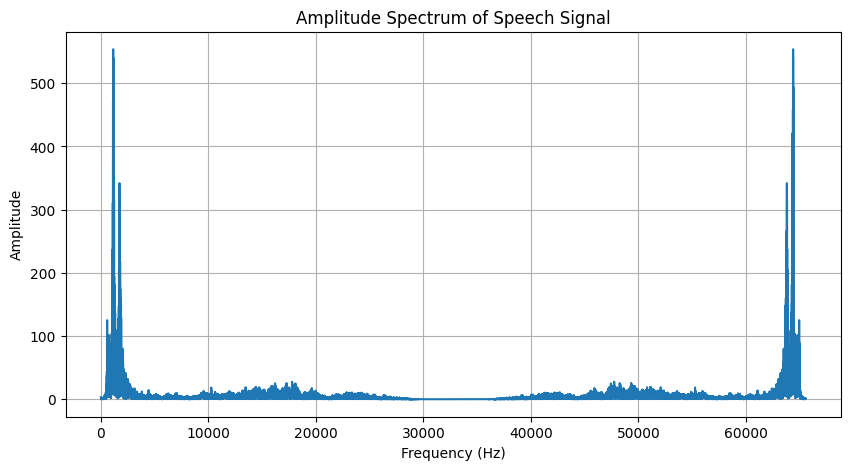

In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_file = 'audio_sample.wav'
signal, sr = librosa.load(audio_file, sr=None)

spectral_domain = np.fft.fft(signal)

magnitude_spectrum = np.abs(spectral_domain)

plt.figure(figsize=(10, 5))
plt.plot(magnitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## A2. Use a rectangular window to select the low frequency components from your spectrum. Inversetransform the filtered spectrum and listen to this sound. Repeat the same for band pass and highpass frequencies of spectrum.

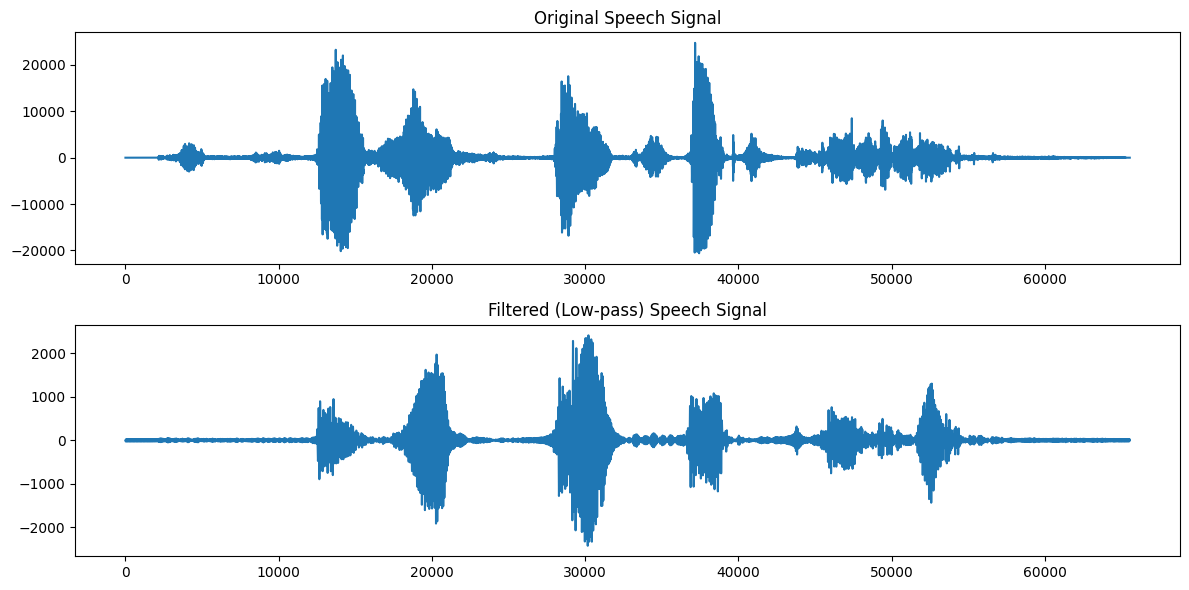

In [12]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

sampling_rate, speech_signal = wavfile.read('audio_sample.wav')

fft_result = np.fft.fft(speech_signal)
amplitudes = np.abs(fft_result)
freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)


low_pass_cutoff = 1000  
rectangular_window_low = np.ones_like(amplitudes)
rectangular_window_low[low_pass_cutoff:] = 0
rectangular_window_low[-low_pass_cutoff:] = 0
filtered_spectrum_low = fft_result * rectangular_window_low

filtered_signal_low = ifft(filtered_spectrum_low).real

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_low)
plt.title('Filtered (Low-pass) Speech Signal')

plt.tight_layout()
plt.show()

wavfile.write('filtered_low_pass.wav', sampling_rate, filtered_signal_low.astype(np.int16))

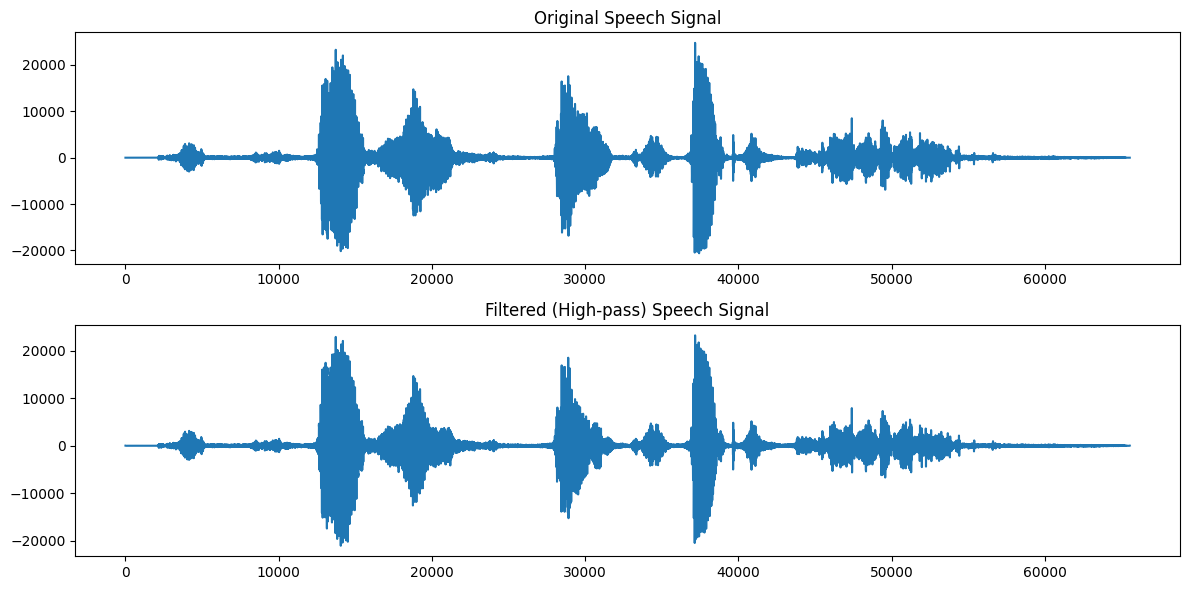

In [13]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

sampling_rate, speech_signal = wavfile.read('audio_sample.wav')

fft_result = np.fft.fft(speech_signal)

amplitudes = np.abs(fft_result)

freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)


high_pass_cutoff = 1000  
rectangular_window_high = np.ones_like(amplitudes)
rectangular_window_high[:high_pass_cutoff] = 0
rectangular_window_high[-high_pass_cutoff:] = 0

filtered_spectrum_high = fft_result * rectangular_window_high

filtered_signal_high = ifft(filtered_spectrum_high).real

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_high)
plt.title('Filtered (High-pass) Speech Signal')

plt.tight_layout()
plt.show()

wavfile.write('filtered_high_pass.wav', sampling_rate, filtered_signal_high.astype(np.int16))


## A3. Repeat A2 with other filter types such as Cosine / Gausian filters.

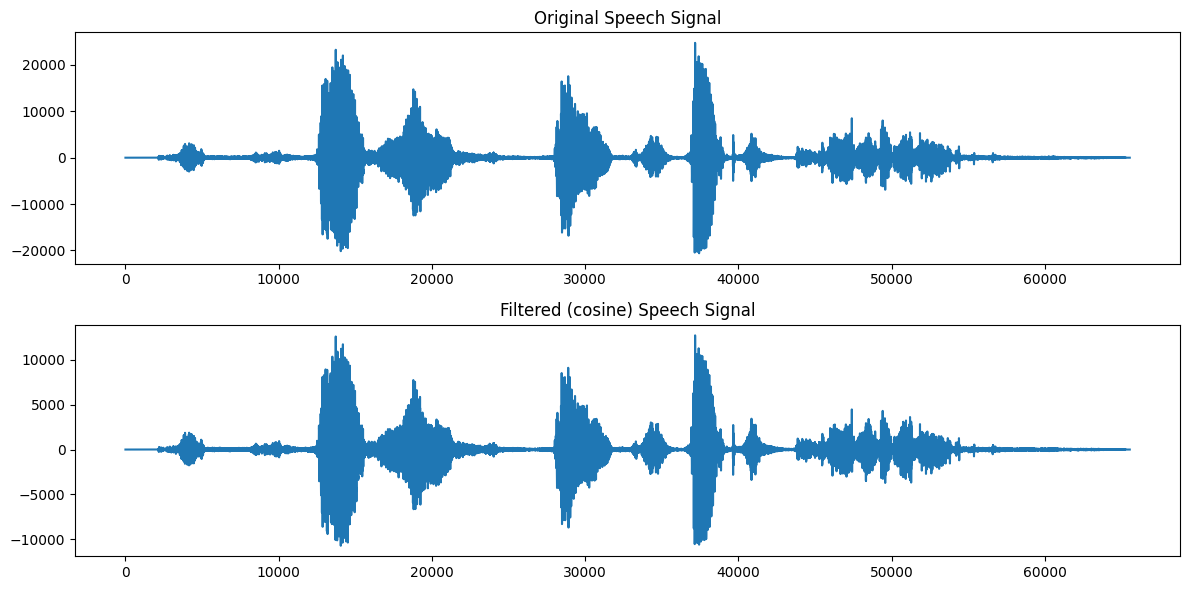

In [14]:
# cosine
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

sampling_rate, speech_signal = wavfile.read('audio_sample.wav')

fft_result = np.fft.fft(speech_signal)

amplitudes = np.abs(fft_result)

freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)



low_pass_cutoff = 1000  
cosine_window_low = np.ones_like(amplitudes)
cosine_window_low[low_pass_cutoff:] = np.cos(np.linspace(0, np.pi / 2, len(cosine_window_low) - low_pass_cutoff))

filtered_spectrum_low = fft_result * cosine_window_low

filtered_signal_low = ifft(filtered_spectrum_low).real

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_low)
plt.title('Filtered (cosine) Speech Signal')

plt.tight_layout()
plt.show()

wavfile.write('filtered_low_pass_cosine.wav', sampling_rate, filtered_signal_low.astype(np.int16))


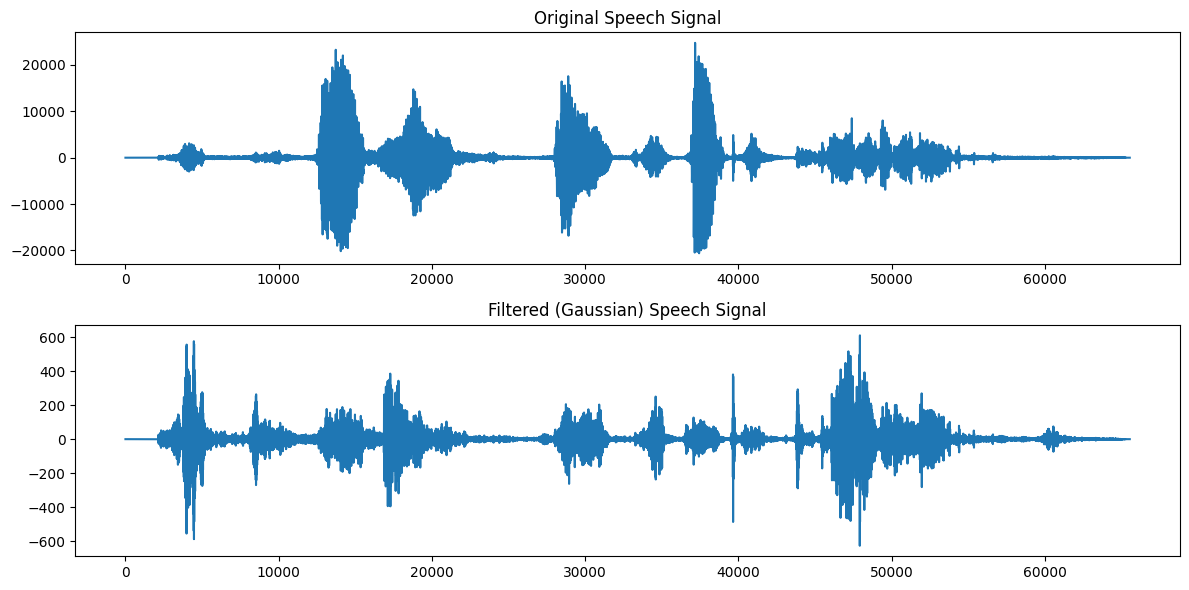

In [10]:
# Gausisan

from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

sampling_rate, speech_signal = wavfile.read('audio_sample.wav')

fft_result = np.fft.fft(speech_signal)

amplitudes = np.abs(fft_result)

freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)


gaussian_window = np.exp(-0.5 * ((freq_axis - 1000) / 200)**2)  

filtered_spectrum_gaussian = fft_result * gaussian_window

filtered_signal_gaussian = ifft(filtered_spectrum_gaussian).real

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_gaussian)
plt.title('Filtered (Gaussian) Speech Signal')

plt.tight_layout()
plt.show()

wavfile.write('filtered_gaussian.wav', sampling_rate, filtered_signal_gaussian.astype(np.int16))
